In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16


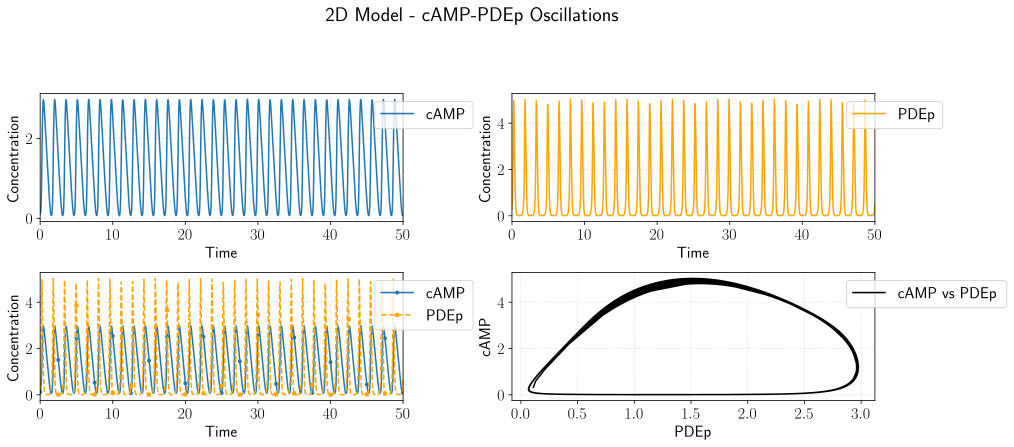

In [58]:
def cAMP_PDEp_ACp(t, x):
    cAMP = x[0]
    PDEp = x[1]

    def G(u, v, J, K): # equation (4)
            numerator = 2 * u * K # numerator of the fraction
            den_1 = v - u + v * J + u * K # first part of the denominator
            den_2 = -4 * (v - u) * u * K # second part of the denominator
            radicand = den_1**2 + den_2 # expression under the square root
            denominator = den_1 + np.sqrt(radicand) # compute the entire denominator
            return numerator / denominator # compute and return the fraction

    ACp = ACt*G(r1*cAMP, r2*Dt, Km1/ACt, Km2/ACt)
    dPDEp  = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dcAMP = (k1*ACp) - (k3 + k2 * PDEp) * cAMP

    return [dcAMP, dPDEp]

# oscillating parameters
# interesting bifurcation values at k1 = 4.5 -> stable spiral at 0.8 stable node
                                   #k3 2 -> 2 other eigenvalues appear both with negative real eigenvalues
                                   #k2 at 3.75 the complex eigenvalues disappear and we have unstable node and saddle ->
                                   #k2 at 3.37 we have complex eigenvalues appearing again and it is a unstable spiral again and it dissapears again at value 2.99
                                   #k2 at 0.7 we have two sable spiral appearsing but we hava one negative fixed point so I guess that does not count?
                                   #r1 @ 1.29 -> stable spiral

k1, k3, k2 = 9.18, 0.12, 10
r1, r2, r3, r4 = 2.04, 9.34, 0.56, 1.84
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt =  1.26, 10
PDEt, Et = 9.66, 2.04

# old parameters
#k1, k3, k2 = 4.22, 9.19, 8.26
#r1, r2, r3, r4 = 5.86, 2.53, 9.48, 8.75
#Km1, Km2, Km3, Km4 = 9.97, 6.29, 0.31, 0.14
#Dt, ACt =  0.76, 4.58
#PDEt, Et = 10, 1.32

# 2D model
init_conditions = {'dcAMP': 0.32, 'dPDEp': 0.11}
x0 = list(init_conditions.values())
time_interval = [0, 500]

solver = solve_ivp(cAMP_PDEp_ACp, time_interval , x0, t_eval=np.linspace(0, 500, 10000), method='RK45', atol=1e-8, rtol=1e-8)

cAMP, PDEp = solver.y


# Create a figure with multiple axes
fig = plt.figure(figsize=(16, 12))
fig.suptitle("2D Model - cAMP-PDEp Oscillations", fontsize=20)


gs = GridSpec(4, 2, figure=fig)
legend_position = {'bbox_to_anchor': (0.9, 1), 'loc': 'upper left'}

# First row
ax0 = fig.add_subplot(gs[0, 0])
ax0.grid(True, linestyle=':', color='lightgray')
ax0.plot(solver.t, PDEp, label='cAMP', color='#1f77b4')
ax0.set_xlabel('Time')
ax0.set_ylabel('Concentration')
ax0.set_xlim(0, 50)
ax0.legend(**legend_position, fontsize=16)

ax1 = fig.add_subplot(gs[0, 1])
ax1.grid(True, linestyle=':', color='lightgray')
ax1.plot(solver.t, cAMP, label='PDEp', color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
ax1.set_xlim(0, 50)
ax1.legend(**legend_position, fontsize=16)

# Second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.grid(True, linestyle=':', color='lightgray')
ax2.plot(solver.t, PDEp, label='cAMP', color='#1f77b4',linestyle='-', marker='o', markersize=3, markevery=50)
ax2.plot(solver.t, cAMP, label='PDEp', color='orange', linestyle='--', marker='s', markersize=3, markevery=50)
ax2.set_xlabel('Time')
ax2.set_ylabel('Concentration')
ax2.set_xlim(0, 50)
ax2.legend(**legend_position, fontsize=16)

ax3 = fig.add_subplot(gs[1, 1])
ax3.grid(True, linestyle=':', color='lightgray')
ax3.plot(PDEp, cAMP, label='cAMP vs PDEp', color='black')
ax3.set_xlabel('PDEp')
ax3.set_ylabel('cAMP')
ax3.legend(**legend_position, fontsize=16)


# Adjust the layout and show the plot
fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
fig.savefig('cAMP_PDEplonger.png', dpi=300, bbox_inches='tight')
plt.show()

# Third row (centered 3D plot)
#ax4 = fig.add_subplot(gs[2, :], projection='3d')
#ax4.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp', color='green')
#ax4.set_xlabel('cAMP')
#ax4.set_ylabel('PDEp')
#ax4.set_zlabel('ACp')
#ax4.legend(**legend_position, fontsize=16)

# Adjust the spacing between the axes
#fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
#fig.savefig('cAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')
# Show the plots

# Show the plots

In [8]:
PDEp

array([0.11      , 0.13420056, 0.24202059, ..., 2.66011447, 2.49200969,
       2.32174664])